# Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Run

In [2]:
result = !python main.py @config/defaults.txt

# Parse output

In [3]:
result = result[1:]

iter_result = result[:-1]
final_result = result[-1]

# N = int(final_result.split(',')[17])

iter_result = [l.split('   ') for l in iter_result]

neighbor_fitness = np.array([float(l[3]) for l in iter_result])
current_fitness = np.array([float(l[4]) for l in iter_result])
best_fitness = np.array([float(l[5]) for l in iter_result])
temp = np.array([float(l[6]) for l in iter_result])

# Compute probability over time

In [4]:
prob = np.exp((neighbor_fitness - current_fitness) / temp)
prob = np.where(prob >= 1, 0, prob)

In [5]:
print(neighbor_fitness.size)
print(current_fitness.size)

92102
92102


In [6]:
import pandas as pd

In [7]:
pd.DataFrame(np.array([(neighbor_fitness - current_fitness)[1620:1630], temp[1620:1630], ((neighbor_fitness - current_fitness) / temp)[1620:1630], prob[1620:1630]]).transpose())

,0,1,2,3
0,-0.003,0.027666,-0.108437,0.897235
1,-0.007,0.027664,-0.253033,0.776442
2,0.000,0.027663,0.000000,0.000000
3,0.007,0.027662,0.253058,0.000000
4,-0.010,0.027660,-0.361530,0.696610
5,-0.003,0.027659,-0.108464,0.897211
6,-0.014,0.027657,-0.506193,0.602786
7,0.000,0.027656,0.000000,0.000000
8,0.000,0.027655,0.000000,0.000000
9,-0.026,0.027653,-0.940213,0.390545


# Plot

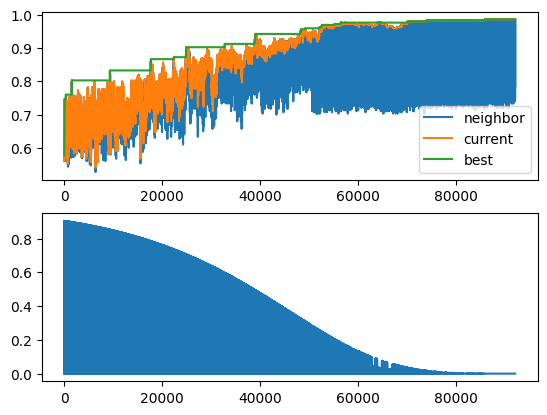

In [8]:
window = range(0,len(neighbor_fitness))
# window = range(40000,len(neighbor_fitness))
# window = range(1600,1700)

ax1 = plt.subplot(211)
ax1.plot(neighbor_fitness[window], label="neighbor")
ax1.plot(current_fitness[window], label="current")
ax1.plot(best_fitness[window], label="best")
ax1.legend()

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(prob[window])

# ax2 = plt.subplot(313, sharex=ax1)
# ax2.plot((neighbor_fitness - current_fitness)[window])

In [9]:
result[-1]

'126.12944152000001,0.9866666666666667,0.9107735470941883,0.8265898466092637,16139,4086471384,1941796842,3116531552,4290614988,1930468394,1486423214,3632295947,4083022719,500,500,15,1,1,300,0.0,SA,SRMP,SRMP,None,None,None,None,None,0.03,0.99995,1,0.0003,None,None,None,16139,None,None,None,None,None,None'